### 图像金字塔
#### pyrup() -----由上向下构建金字塔
#### pyrdown()  -----由下向上构建金字塔

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
img=cv2.imread(r'E:\pythonProject\opencvProject\resources\orange.jpg')
lower1_img=cv2.pyrDown(img)
lower2_img=cv2.pyrDown(lower1_img)
lower3_img=cv2.pyrDown(lower2_img)
lower4_img=cv2.pyrDown(lower3_img)
lower5_img=cv2.pyrDown(lower4_img)

# img=cv2.imread(r'E:\pythonProject\opencvProject\resources\1.jpg')
# lower1_img=cv2.pyrUp(img)
# lower2_img=cv2.pyrUp(lower1_img)
# lower3_img=cv2.pyrUp(lower2_img)
# lower4_img=cv2.pyrUp(lower3_img)
# lower5_img=cv2.pyrUp(lower4_img)


# print(img.shape,lower1_img.shape,lower2_img.shape,lower3_img.shape,lower4_img.shape,lower5_img.shape)

In [ ]:
# cv2.namedWindow('pyramid',0)
# cv2.imshow('pyramid',lower1_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
plt.subplot(231),plt.imshow(lower5_img),plt.title('第一层'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(lower4_img),plt.title('第二层'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(lower3_img),plt.title('第三层'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(lower2_img),plt.title('第四层'),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(lower1_img),plt.title('第五层'),plt.xticks([]),plt.yticks([])
plt.subplot(236),plt.imshow(img),plt.title('第六层'),plt.xticks([]),plt.yticks([])

##### 图像金字塔用于图像融合

In [ ]:
import numpy as np
apple=cv2.imread(r'E:\pythonProject\opencvProject\resources\apple.jpg')
orange=cv2.imread(r'E:\pythonProject\opencvProject\resources\orange.jpg')

# 获取高斯金字塔
G1=apple.copy()
gpa=[G1]
G2=orange.copy()
gpo=[G2]
for i in range(3):
    G1=cv2.pyrDown(G1)
    G2=cv2.pyrDown(G2)
    gpa.append(G1)
    gpo.append(G2)

print(len(gpa),len(gpo))
for i in range(4):
    print(gpa[i].shape)

In [ ]:
# 获取每一层的拉普拉斯金字塔
Lpa=[gpa[3]]
Lpo=[gpo[3]]
for i in range(3,0,-1):
    GEa = cv2.pyrUp(gpa[i])
    GEo =cv2.pyrUp(gpo[i])
    La= np.subtract(gpa[i-1],GEa)
    Lo=np.subtract(gpo[i-1],GEo)
    Lpa.append(La)
    Lpo.append(Lo)

print(len(Lpa),len(Lpo))

#### 每一层拉普拉斯进行融合




In [ ]:
LS=[]
for x,y in zip(Lpa,Lpo):
    rows,cols,dims=x.shape
    ls=np.hstack((x[:,:int(cols/2)],y[:,int(cols/2):]))
    LS.append(ls)

ls=LS[0]
for i in range(1,4):
    ls=cv2.pyrUp(ls)
    ls=np.add(ls,LS[i])


In [ ]:
plt.imshow(ls),plt.title('1'),plt.xticks([]),plt.yticks([])


In [8]:
plt.imshow(ls),plt.title('1'),plt.xticks([]),plt.yticks([])


In [9]:
img=cv2.imread(r'E:\pythonProject\opencvProject\resources\orange.jpg')
lower1_img=cv2.pyrDown(img)
lower2_img=cv2.pyrDown(lower1_img)
lower3_img=cv2.pyrDown(lower2_img)
lower4_img=cv2.pyrDown(lower3_img)
lower5_img=cv2.pyrDown(lower4_img)

# img=cv2.imread(r'E:\pythonProject\opencvProject\resources\1.jpg')
# lower1_img=cv2.pyrUp(img)
# lower2_img=cv2.pyrUp(lower1_img)
# lower3_img=cv2.pyrUp(lower2_img)
# lower4_img=cv2.pyrUp(lower3_img)
# lower5_img=cv2.pyrUp(lower4_img)


# print(img.shape,lower1_img.shape,lower2_img.shape,lower3_img.shape,lower4_img.shape,lower5_img.shape)

In [10]:
# cv2.namedWindow('pyramid',0)
# cv2.imshow('pyramid',lower1_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(<matplotlib.axes._subplots.AxesSubplot at 0x21c0f16c2e0>,
 Text(0.5, 1.0, '第六层'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
H:\python\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s

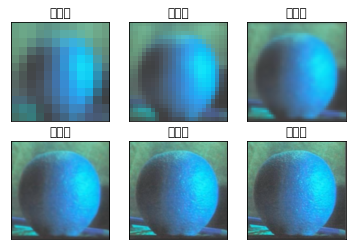

In [11]:
plt.subplot(231),plt.imshow(lower5_img),plt.title('第一层'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(lower4_img),plt.title('第二层'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(lower3_img),plt.title('第三层'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(lower2_img),plt.title('第四层'),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(lower1_img),plt.title('第五层'),plt.xticks([]),plt.yticks([])
plt.subplot(236),plt.imshow(img),plt.title('第六层'),plt.xticks([]),plt.yticks([])

##### 图像金字塔用于图像融合

In [12]:
import numpy as np
apple=cv2.imread(r'E:\pythonProject\opencvProject\resources\apple.jpg')
orange=cv2.imread(r'E:\pythonProject\opencvProject\resources\orange.jpg')

# 获取高斯金字塔
G1=apple.copy()
gpa=[G1]
G2=orange.copy()
gpo=[G2]
for i in range(3):
    G1=cv2.pyrDown(G1)
    G2=cv2.pyrDown(G2)
    gpa.append(G1)
    gpo.append(G2)

print(len(gpa),len(gpo))
for i in range(4):
    print(gpa[i].shape)

4 4
(360, 360, 3)
(180, 180, 3)
(90, 90, 3)
(45, 45, 3)


In [13]:
# 获取每一层的拉普拉斯金字塔
Lpa=[gpa[3]]
Lpo=[gpo[3]]
for i in xrange(3,0,-1):
    GEa = cv2.pyrUp(gpa[i])
    GEo =cv2.pyrUp(gpo[i])
    La= np.subtract(gpa[i-1],GEa)
    Lo=np.subtract(gpo[i-1],GEo)
    Lpa.append(La)
    Lpo.append(Lo)

print(len(Lpa),len(Lpo))

4 4


#### 每一层拉普拉斯进行融合




In [19]:
LS=[]
for x,y in zip(Lpa,Lpo):
    rows,cols,dims=x.shape
    ls=np.hstack((x[:,:int(cols/2)],y[:,int(cols/2):]))
    LS.append(ls)

ls=LS[0]
for i in range(1,4):
    ls=cv2.pyrUp(ls)
    ls=np.add(ls,LS[i])



(90, 90, 3)
(180, 180, 3)
(360, 360, 3)


直接融合实例


In [22]:
rows,cols,dims=apple.shape
real=np.hstack((apple[:,:int(cols/2)],orange[:,int(cols/2):]))


(<matplotlib.axes._subplots.AxesSubplot at 0x21c0fd5af10>,
 Text(0.5, 1.0, '1'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

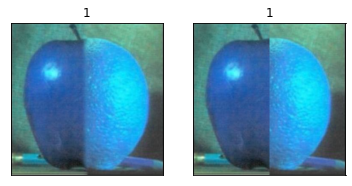

In [24]:
plt.subplot(121),plt.imshow(ls),plt.title('1'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(real),plt.title('1'),plt.xticks([]),plt.yticks([])